In [1]:
import numpy as np
import pandas as pd

In [2]:
!pwd

/media/atif/Data/DataScience/EDX/UCSandiago_Specialisation/python_for_data_science/Week4


In [3]:
!ls


Introduction to Pandas.ipynb		 ml-20m		Week-4-Pandas.zip
Lect1_Introduction_to_pandas.ipynb	 ml-20m.zip
Lecture_2_Movie_Lens_DataAnalysis.ipynb  Week-4-Pandas


In [4]:
!ls ./ml-20m/


genome-scores.csv  links.csv   ratings.csv  tags.csv
genome-tags.csv    movies.csv  README.txt


In [5]:
# !cat ./ml-20m/movies.csv

In [6]:
!cat ./ml-20m/movies.csv |wc -l

27279


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [7]:
movies=pd.read_csv("./ml-20m/movies.csv",sep=",")
print(type(movies))
movies.head(5)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings=pd.read_csv("./ml-20m/ratings.csv",sep=",")
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [9]:
tags=pd.read_csv("./ml-20m/tags.csv",sep=",")
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [10]:
# For current analysis, we will remove timestamp (we will come back to it!)
del ratings['timestamp']
del tags['timestamp']

## Data Structures

### Series



In [11]:
row_0 =tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [12]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [13]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [14]:
row_0['userId']

18

In [15]:
'rating' in row_0


False

In [16]:
row_0.name

0

In [17]:
row_0=row_0.rename('first_row')
row_0.name
row_0.name

'first_row'

### DataFrames

In [18]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [19]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [20]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [21]:
# Extract row 0, 11, 2000 from dataframe tags
tags.iloc[[0,11,2000]]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
2000,910,68554,conspiracy theory


# Pandas Statistics

## describe() -> gives mean, min ,etc

In [22]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [23]:
# or to get mean of just one column 
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

## Corr -> calculate pearson's corelation
### Note: Neagative corelation= if x increases y decreases
### positive both increases at same time

In [24]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


## func() =mean , median , mode

In [25]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

<p style="color:red;font-size:300%">Descriptive Statistics</p>

In [26]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [27]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [28]:
ratings['rating'].mean()

3.5255285642993797

In [29]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [30]:
ratings['rating'].min()

0.5

In [31]:
ratings['rating'].max()

5.0

In [32]:
ratings.std()

userId     40038.626653
movieId    19789.477445
rating         1.051989
dtype: float64

In [33]:
ratings['rating'].std()

1.0519889192942424

In [34]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [35]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [36]:
filter_1=ratings['rating']>5
ratings[filter_1] # query is empty because rating cant be more than 5

,userId,movieId,rating


In [37]:
# return if any value matches it 
filter_1.any()

False

In [38]:
filter_2=ratings['rating']>0
ratings[filter_2]

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
5,1,112,3.5
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
9,1,260,4.0


In [39]:
filter_2.any()

True

<p style="color:red;font-size:250%;margin-bottom:10px;    margin-top: 10px;
">Data Cleaning:Handling Missing Data</p>

# Pandas : Data Cleaning

## df.replace( )

## df.fillNa( )
## df.dropna() -> axis=0
## df.interplate( )


<p style="color:green;font-size:2em;margin-bottom:10px;    margin-top: 10px;
">Data Cleaning:Practical Part</p>

In [40]:
movies.shape

(27278, 3)

In [41]:
# is any row NULL?
movies.isnull() # gives a boolean value

,movieId,title,genres
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [42]:
movies.isnull().any() # cheking if any value is null

movieId    False
title      False
genres     False
dtype: bool

In [43]:
# Now for ratings
ratings.shape

(20000263, 3)

In [44]:
# is any value null
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [45]:
# Now for tags
tags.shape

(465564, 3)

In [46]:
# is any value null
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

### we have some tags which are null

In [47]:
# so we gonna drop it
tags=tags.dropna()

In [48]:
tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [49]:
#no of rows will be reduced as we have drop the rows containing any null
tags.shape

(465548, 3)

<p style="color:maroon;font-size:200%;margin-bottom:10px;    margin-top: 10px;
">Pandas: Data Visualisation</p>

### Plotting:
* df.plot.bar()
* df.plot.box()
* df.plot.hist()
* df.plot()


In [50]:
%matplotlib inline


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2431a1fc88>]],
      dtype=object)

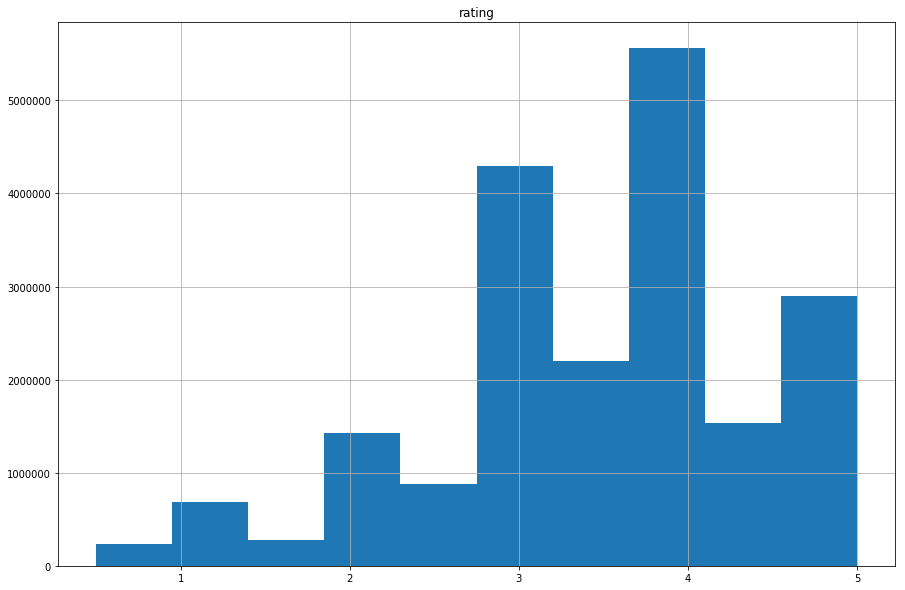

In [51]:
ratings.hist(column='rating',figsize=(15,10))

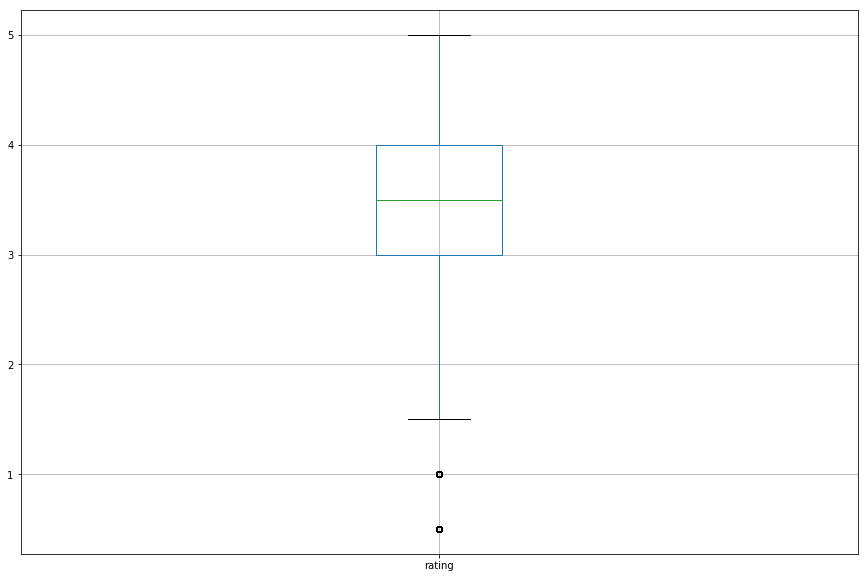

In [52]:
ratings.boxplot(column='rating',figsize=(15,10))

<p style="color:red;font-size:250%;margin-bottom:10px;    margin-top: 10px;
">Frequent Data Operations</p>

<p style="color:blue;font-size:200%;margin-bottom:10px;    margin-top: 10px;
">Slicing out columns</p>

In [53]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [54]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [55]:
ratings[1000:1010]

,userId,movieId,rating
1000,11,527,4.5
1001,11,531,4.5
1002,11,541,4.5
1003,11,546,5.0
1004,11,551,5.0
1005,11,586,4.0
1006,11,587,4.5
1007,11,588,5.0
1008,11,589,4.5
1009,11,592,4.5


In [56]:
tag_counts=tags['tag'].value_counts()

In [57]:
tag_counts

sci-fi                                            3384
based on a book                                   3281
atmospheric                                       2917
comedy                                            2779
action                                            2657
surreal                                           2427
BD-R                                              2334
twist ending                                      2323
funny                                             2072
dystopia                                          1991
stylized                                          1941
quirky                                            1906
dark comedy                                       1899
classic                                           1769
psychology                                        1754
fantasy                                           1703
time travel                                       1549
romance                                           1534
visually a

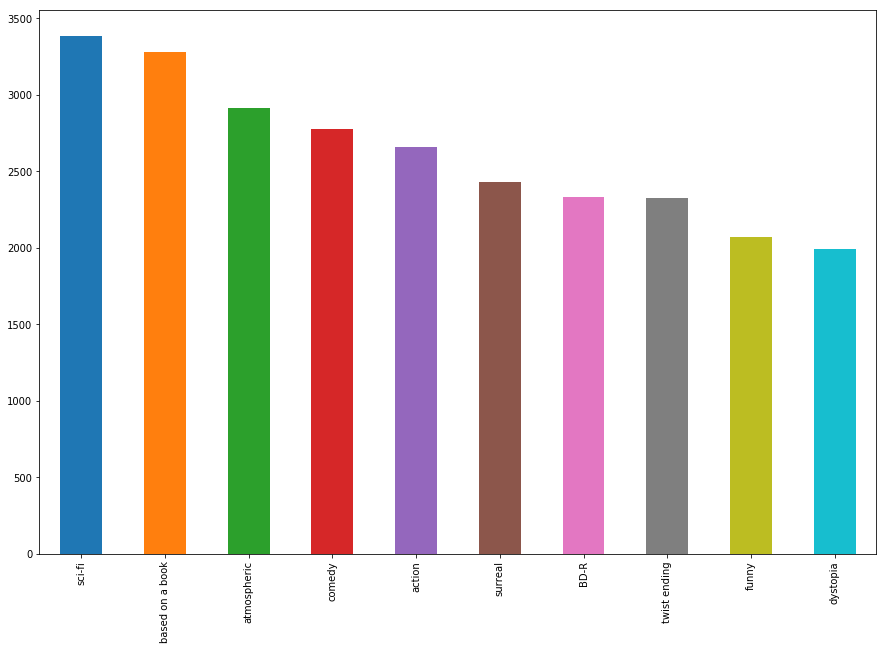

In [58]:
tag_counts[:10].plot(kind='bar',figsize=(15,10))

<p style="color:blue;font-size:200%;margin-bottom:10px;    margin-top: 10px;
">Filters for selecting Rows</p>

In [59]:
is_highly_rated=ratings['rating']>=4.0
x=ratings[is_highly_rated][-5:]
x

,userId,movieId,rating
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000261,138493,70286,5.0


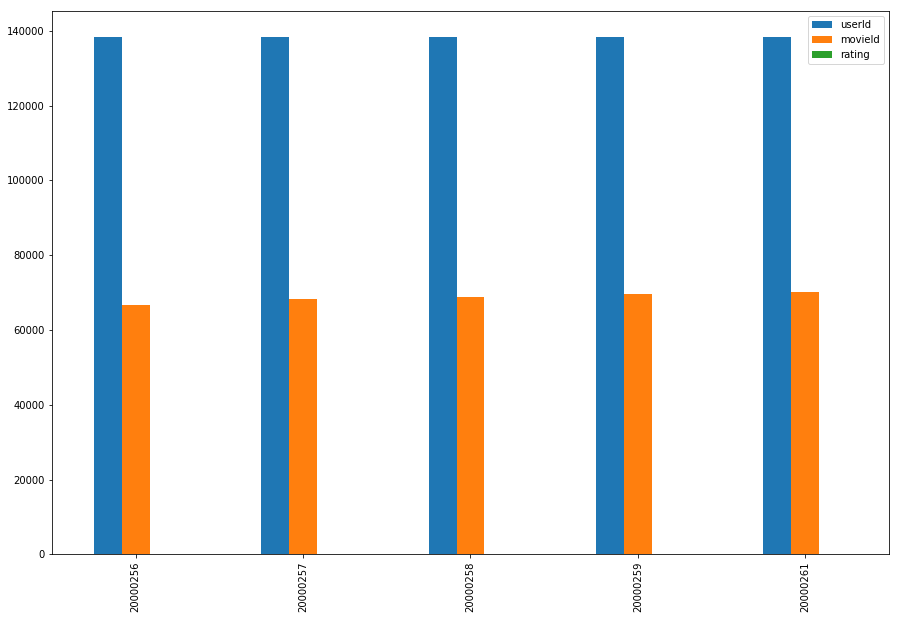

In [60]:
x.plot(kind='bar',figsize=(15,10))

In [61]:
is_animation=movies['genres'].str.contains('Animation')
movies[is_animation][:20]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


<p style="color:blue;font-size:200%;margin-bottom:10px;    margin-top: 10px;
">Group by Aggregate</p>

In [62]:
ratings_count=ratings[['movieId','rating']].groupby('rating').count()

In [63]:
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [66]:
average_rating=ratings[['movieId','rating']].groupby('movieId').mean()

In [68]:
average_rating

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592
6,3.834930
7,3.366484
8,3.142049
9,3.004924


<p style="color:red;font-size:250%;margin-bottom:10px;    margin-top: 10px;
">Merging DataFrames</p>

* pd.concat([left,right])
* pd.appned()

* pd.merge -> mostly favoures


In [69]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [70]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [71]:
t=movies.merge(tags,on='movieId',how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


<p style="color:red;font-size:150%;margin-bottom:10px;    margin-top: 10px;
">Combine aggreagation, merging, and filters to get useful analytics</p>

In [72]:
avg_rating=ratings.groupby('movieId',as_index=False).mean()
avg_rating

,movieId,userId,rating
0,1,69282.396821,3.921240
1,2,69169.928202,3.211977
2,3,69072.079388,3.151040
3,4,69652.913280,2.861393
4,5,69113.475454,3.064592
5,6,69226.328633,3.834930
6,7,69100.961809,3.366484
7,8,68677.092580,3.142049
8,9,70310.064899,3.004924
9,10,69161.741045,3.430029


In [73]:
del avg_rating['userId']
avg_rating.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [74]:
box_office=movies.merge(average_rating,on='movieId',how='inner')
box_office.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592


# Vectorized String Operations

In [75]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [76]:
# split genres into multiple columns
movies_genres=movies['genres'].str.split("|")

In [77]:
movies_genres.head()

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
Name: genres, dtype: object

In [78]:
# Above will give a list , so make it series of the dataframe
movies_genres=movies['genres'].str.split("|",expand=True)

In [79]:
movies_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


## str.contains()

In [80]:
# Add a new column for comedy genre flag
movies_genres['isComedy']=movies['genres'].str.contains('Comedy')

In [82]:
movies_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


## str.extract( )

In [83]:
# Extract a year from title e.g (1995)
movies['year']=movies['title'].str.extract('.*\((.*)\).*',expand=True)

In [88]:
movies.tail(7)

,movieId,title,genres,year
27271,131250,No More School (2000),Comedy,2000
27272,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,2001
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


## Parsing Timestamps

In [89]:
tags=pd.read_csv('./ml-20m/tags.csv',sep=',')

In [90]:
tags.dtypes


userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [91]:
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [92]:
tags['parsed_time']=pd.to_datetime(tags['timestamp'],unit='s')

In [93]:
tags.head(10)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18
2,65,353,dark hero,1368150079,2013-05-10 01:41:19
3,65,521,noir thriller,1368149983,2013-05-10 01:39:43
4,65,592,dark hero,1368150078,2013-05-10 01:41:18
5,65,668,bollywood,1368149876,2013-05-10 01:37:56
6,65,898,screwball comedy,1368150160,2013-05-10 01:42:40
7,65,1248,noir thriller,1368149983,2013-05-10 01:39:43
8,65,1391,mars,1368150055,2013-05-10 01:40:55
9,65,1617,neo-noir,1368150217,2013-05-10 01:43:37


In [94]:
tags['parsed_time'].dtype

dtype('<M8[ns]')

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [96]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]
print(selected_rows)

tags.shape, selected_rows.shape

        userId  movieId                       tag   timestamp  \
301        318      260                     1970s  1424472169   
302        318      260                   fantasy  1424472169   
303        318      260                    sci-fi  1424472169   
304        318   115149                    Action  1424534310   
305        318   115149                   Revenge  1424534283   
306        318   115149              Willem Dafoe  1424534383   
324        342      318                masterplan  1423424898   
326        342      318             prison escape  1423424898   
327        342      318                redemption  1423424898   
589        342   108190           based on a book  1426978115   
590        342   108190                  dystopia  1426978076   
1018       370     6975  breaking the fourth wall  1425242234   
1019       370    27592                   violent  1425241975   
2203       969       97            class conflict  1426754226   
2204       969      288  

((465564, 5), (12130, 5))

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [98]:
tags.sort_values(by='parsed_time',ascending=True)[:10]
tags

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18
2,65,353,dark hero,1368150079,2013-05-10 01:41:19
3,65,521,noir thriller,1368149983,2013-05-10 01:39:43
4,65,592,dark hero,1368150078,2013-05-10 01:41:18
5,65,668,bollywood,1368149876,2013-05-10 01:37:56
6,65,898,screwball comedy,1368150160,2013-05-10 01:42:40
7,65,1248,noir thriller,1368149983,2013-05-10 01:39:43
8,65,1391,mars,1368150055,2013-05-10 01:40:55
9,65,1617,neo-noir,1368150217,2013-05-10 01:43:37


<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie ratings related to the year of launch?

In [100]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [101]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

,movieId,rating
movieId,1.000000,-0.090369
rating,-0.090369,1.000000


In [102]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1891,3.000000
1,1893,3.375000
2,1894,3.071429
3,1895,3.125000
4,1896,3.183036
5,1898,3.850000
6,1899,3.625000
7,1900,3.166667
8,1901,5.000000
9,1902,3.738189


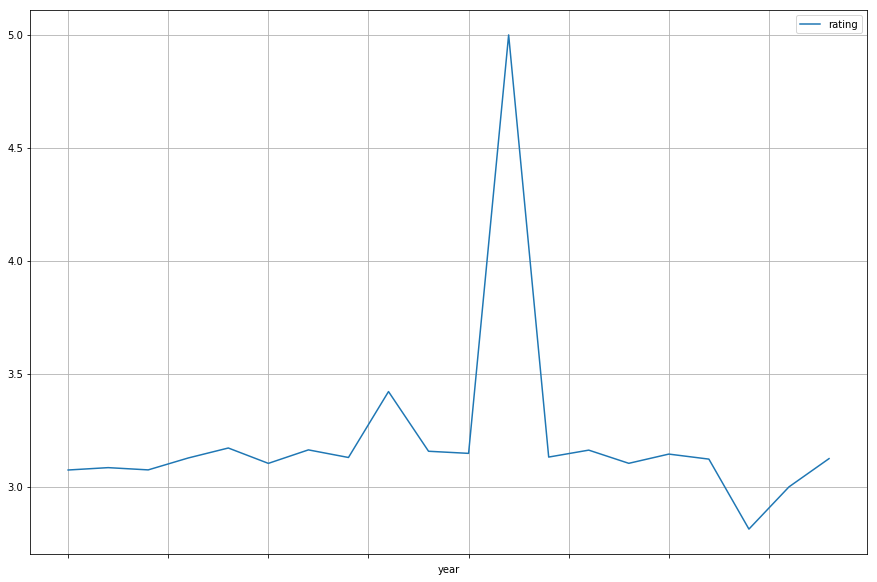

In [103]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)